# Matrices for image blurring

In [1]:
import numpy as np
import matplotlib.pyplot as pt

In [2]:
from PIL import Image

with Image.open("cat.jpeg").resize((500,500)) as img:
    img = np.array(img).sum(axis=-1)
    
h, w = img.shape

/usr/lib/python3/dist-packages/PIL/Image.py:1531: ResourceWarning: unclosed file <_io.BufferedReader name='cat.jpeg'>
  self.load()


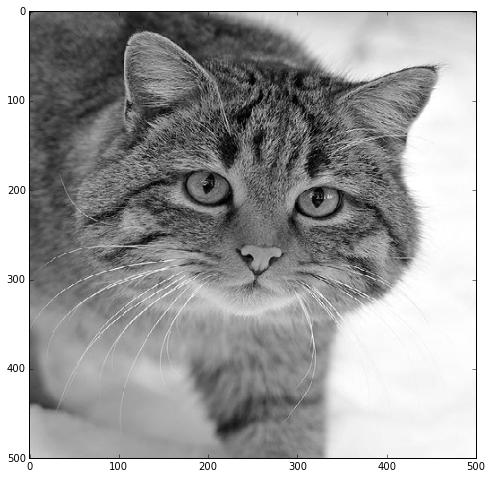

In [3]:
pt.figure(figsize=(8,8))
pt.imshow(img, cmap="gray")

Now make a Gaussian with as many pixels as the image is wide.

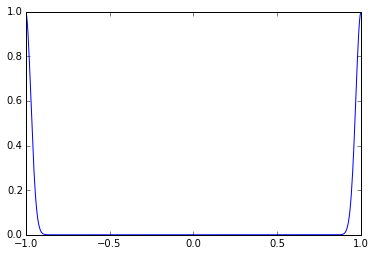

In [4]:
x = np.linspace(-1, 1, w)
gaussian = np.exp(-500*x**2)
gaussian = np.roll(gaussian, -w//2)
pt.plot(x, gaussian)

Now, fill a $w\times w$ matrix with shifted versions of this:

In [5]:
A = np.zeros((w,w))
for i in range(w):
    A[:, i] = np.roll(gaussian, i)

Here's a plot to show what just happened:

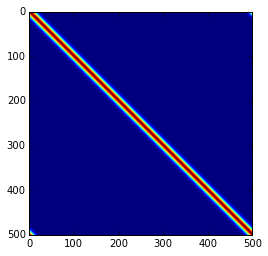

In [6]:
pt.imshow(A)

Multiply the cat by this.

In [7]:
blurrycat = A.dot(img)

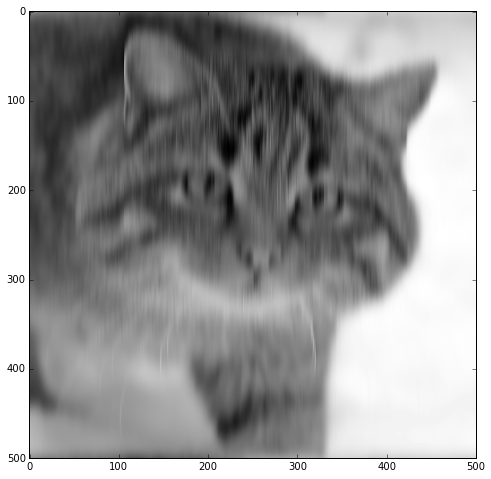

In [8]:
pt.figure(figsize=(8,8))
pt.imshow(blurrycat, cmap="gray")